In [30]:
using ModelingToolkit
using MethodOfLines
using DifferentialEquations
using DomainSets
using FFTW
using Plots

In [31]:
xleft::Float64 = 0.0;
xright::Float64 = 1.0;
t0::Float64 = 0.0;
T::Float64 = 10.0;
dt = 0.01;
Nx = 50;
Nt = T / dt;
order = 2;
step = (xright - xleft)/Nx;
grid = collect(xleft:step:xright);

g0::Float64 = 9.81; # m / s^2
height = 0.1; # m
omega = 2*pi*1
gamma = 0.0
gamma_3 = 0.0
A = 5.0


5.0

In [32]:
function f1!(dv, v, u, p, t)
    dx, c, γ, γ3, A, omega = p
    N = length(u)
    invdx2 = 1 / dx^2

    # interior points
    @inbounds for i in 2:N-1
        uxx = (u[i+1] - 2u[i] + u[i-1]) * invdx2
        dv[i] = c^2 * uxx - γ * v[i] - γ3 * v[i]^3 + A * sin(omega * t)
    end
    dv[1] = 0
    dv[end] = 0
    

end


function f2!(du, v, u, p, t)
    dx, c, γ, γ3, A, omega = p
    N = length(u)
    du .= v
    du[1] = 0
    du[end] = 0
end



f2! (generic function with 1 method)

In [33]:
u0 = zeros(Nx+1)
v0 = zeros(Nx+1)

tspan = (0.0, 10.0)
p = (step, sqrt(g0 * height), gamma, gamma_3, A, omega)


(0.02, 0.9904544411531507, 0.0, 0.0, 5.0, 6.283185307179586)

In [34]:
prob = DynamicalODEProblem(f1!, f2!, u0, v0, tspan, p)
solution = solve(prob, VelocityVerlet(), reltol = 1e-8, abstol = 1e-8, dt = 0.001)


retcode: Success
Interpolation: 3rd order Hermite
t: 10001-element Vector{Float64}:
  0.0
  0.001
  0.002
  0.003
  0.004
  0.005
  0.006
  0.007
  0.008
  0.009000000000000001
  0.010000000000000002
  0.011000000000000003
  0.012000000000000004
  ⋮
  9.988999999999903
  9.989999999999903
  9.990999999999902
  9.991999999999901
  9.9929999999999
  9.9939999999999
  9.9949999999999
  9.9959999999999
  9.996999999999899
  9.997999999999898
  9.998999999999898
 10.0
u: 10001-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
 ([0.0, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5, 1.570785991389738e-5  …  1.570785991389738e-5

In [35]:
println(size(solution))

(102, 10001)


[ Info: Saved animation to /home/kamilj/Documents/git_repos/TW3715TU-2025-ShallowWaters/solution_animation_1.gif


Plots.AnimatedGif("/home/kamilj/Documents/git_repos/TW3715TU-2025-ShallowWaters/solution_animation_1.gif")
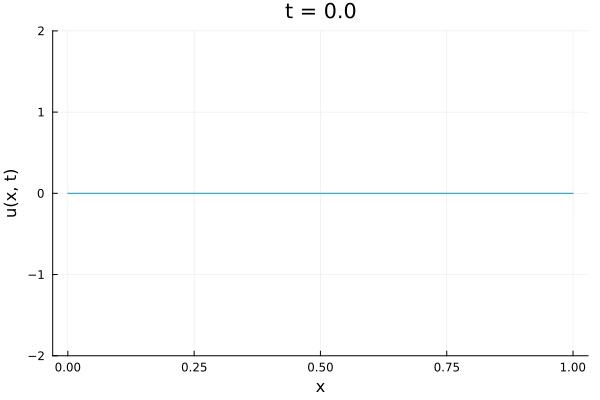

In [36]:
# Your solution data
discrete_t = solution.t
grid = grid

Nx = length(grid)
Nt = length(discrete_t)

# Create the animation object
anim = @animate for k in 1:100:Nt
    t = discrete_t[k]
    plot(
        grid, solution.u[k].x[1],
        ylim = (-2, 2),
        xlabel = "x",
        ylabel = "u(x, t)",
        title = "t = $(round(t, digits=2))",
        legend = false
    )
end

# Save the animation as a GIF
gif(anim, "solution_animation_1.gif", fps = 10)